# Korzystanie z Google Trends przy pomocy pytrends

## Tworzenie zapytań do GT 

Najpierw musimy połączyć się z Googlem, aby móc pobierać dane z Google Trends. W tym celu potrzebna jest funkcja **TrendReq()**
z biblioteki pytrends.request. 

Parametr **hl** określa język hosta. Parametr ten jest o tyle ważne, że ustawia strefę czasową. Jeżeli zatem chcemy, aby wyniki wyświetlały się względem polskiego czasu, ustawiamy ten paramter na 'PL'.

In [2]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl = 'PL')

Zapytanie tworzymy przy pomocy **funkcji build_payload**, której parametry użycia są omówione poniżej:

### kw_list
Lista słów kluczy (keyword list) dla których chcemy otrzymać dane. Limit to 5 słów, podobnie jak w serwisie Google Trends. 

In [2]:
kw_list = ["Koronawirus", "Wybory"]

Możemy też zamiast konkretnych haseł wyszukiwać tematy. Tematy w Google Tredns to zbiory słów dotyczące danego tematu. Przykładowo, jeżeli wybierzemy temat Londyn, zwrócone dane będą sumą wyszukiwań haseł związancyh z Londynem, jak na przykład "capital of england" albo słowa Londyn w różnych językach.

Aby otrzymać dane dla tematu, musimy wprowadzić kod tematu zamiast hasła w parametrze kw_list. Kod ten możemy pobrać z URL po wprowadzeniu tematu ręcznie w serwisie Google Trends.

W URL kod jest dostepny pod wartością q (*q=%2Fm%2F...*). Z kodu musimy usunąć prefix *%2Fm%2F* i zastąpić go */m/*. Przykładowo:
1. Patrzymy na URL dla tematu "Zaburzenia dperesyjne": https://trends.google.com/trends/explore?date=today%205-y&geo=PL&q=%2Fm%2F02bft.
2. Poberamy kod tematu: *%2Fm%2F02bft*
3. Zamieniamy go na: */m/02bft*

In [1]:
kw_list = ["/m/02bft"] # kod dla tematu "Zaburzenia depresyjne"

### cat
Parametr ten określa kategorię, dla której pobieramy dane. Przykładowe kategorie do wyboru to: Sztuka, Zdrowie, Wiadomości, Sport. Domyślna kategoria to "Wszystko". 

Aby użyć tego parametru musimy podać wartość przypisaną do danej kategorii.  Możemy ją znaleźć manualnie wybierając kategorię z serwisu Google Trends. W URL pojawi się cat=x gdzie x to poszukiwana wartość kategorii, np.:

https://www.google.com/trends/explore#q=pizza&cat=71 (kategoria 71, czyli "Żywność i napoje").

In [3]:
cat = 16 # Kategoria: Wiadomości

### geo
Parametr określający dla jakiego obszaru pobieramy dane.

Należy podać dwuliterowy skrót nazwy państwa (np.: Polska to 'PL'). Można też zawęzić obszar do konkretnego regionu/województwa/stanu, dodając dwuliterowy skrót regionu po myślniku (np.: Kujawsko-Pomorskie to 'PL-KP')

Skrót ten można znaleźć, podobnie jak wartości kategorii, manualnie wybierając państwo/region w Google Trends i znajdując wartość w URL jako "geo=x", np.:

https://trends.google.com/trends/explore?date=now%204-H&geo=PL-WP&q=a (skrót 'PL-WP', czyli województwo wielkopolskie).

In [4]:
geo = 'PL'

### timeframe
Przedział czasu dla którego pozyskujemy dane. 

Domyślny format parametru dla "Ostatni rok" itp. to **'today y-x'** (dla godzin i dni **now** zamiast today!), gdzie:
- x to skrót jednostki czasu (rok/miesiąc/dzień/godzina)
- y to o ile tych jednostek wstecz chcemy pobrać dane (dostępne jednostki: 1,5 dla lat; 1,3 dla miesięcy; 1,7 dla dni; 1,4 dla godzin)

Możemy podać konkretne daty w formacie **'YYYY-MM-DD YYYY-MM-DD'** lub **'YYYY-MM-DDTHH YYYY-MM-DDTHH'**, gdzie podana godzina powinna być czasem UTC.

Dla pełnego zakresu (od 2004 do dziś) piszemy **"all"**.

Przykłady:

In [5]:
last_4_hours = "now 4-H"
last_day = "now 1-d"
last_3_months = "today 3-m"
last_5_years = 'today 5-y'
specific_date = "2020-03-14 2020-03-25"
specific_date_with_hours = "2020-04-06T01 2017-04-12T22"
full_timeframe = "all"

### gprop 
Określa dla której wyszukiwarki chcemy otrzymać dane. Podobnie jak w serwisie, dostępne opcje to: 
- **images** (Wyszukiwarka grafiki)
- **news** (Wyszukiwarka wiadomości) 
- **youtube** (Wyszkiwarka w Youtube) 
- **froogle** (Zakupy Google)

Domyślne ustawienie to "Wyszukiwarka Google".


In [6]:
gprop = 'news'

Na koniec przedstawienie parametrów funckji na tle GUI serwisu Google Trends.
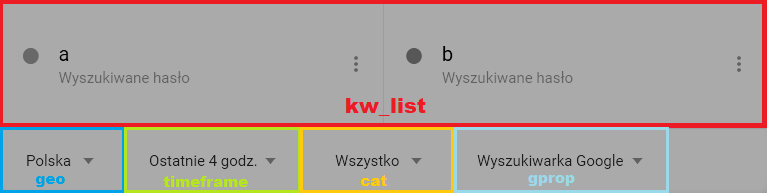

### build_payload
Znając już wszystkie parametry tej funkcji, możemy ją wywołać:

In [7]:
pytrends.build_payload(kw_list, cat=cat, timeframe=last_5_years, geo=geo)

Teraz możemy zacząć pobierać różne ramki danych utworzone na bazie naszego zapytania.

## Pobieranie danych

 ### interest_over_time()
Funkcja zwraca ramkę danych przedstawiająca popularność danego wyszukiwania. W serwisie Google Trends dane te są przedstawione jako wykres "Zainteresowanie w ujęciu czasowym".

In [8]:
pytrends.interest_over_time()

,Koronawirus,Wybory,isPartial
date,,,
2015-06-07,0,1,False
2015-06-14,0,1,False
2015-06-21,0,1,False
2015-06-28,0,0,False
2015-07-05,0,0,False
...,...,...,...
2020-05-03,7,7,False
2020-05-10,6,3,False
2020-05-17,4,2,False


Google Trends czasami wykonuje przewidywanie dla ostatnie okresu czasu na podstawie niepełnych danych.
Atrybut **isPartial** informuje czy wartość danego rekordu jest dla obliczona na podstawie niepełnych danych.
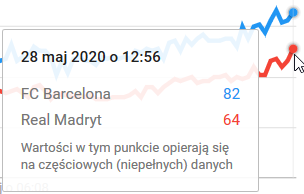

### get_historical_interest()
Funkcja ta wysyła wiele zapytań do Google dla okresu 1 tygodnia. Nastepnie "zlepia" wyniki, dzięki czemu otrzymujemy dane są z dokładnością do godzin, niezależnie od wybranego przedziału czasu (Google Trends domyślnie podaje wyniki z dokładnością zależną od wybranego przedziału, zwykle nie więcej niż 250 rekordów).

Funkcja ta wymaga tych samych parametrów co build_payload() - kw_list, cat, geo, gprop. Zakres czasu podajemy w inny sposób - mamy nowe parametry:
- **year_start, month_start, day_start, hour_start**
- **year_end, month_end, day_end, hour_end**

Jeżeli Google ogranicza szybkość wysyłanych przez nas żądań, możemy użyć parametru **sleep**, który sztucznie opóźnia każde żądanie.

Przykładowe wywołanie funckji dla okresu jednego miesiąca:

In [9]:
pytrends.get_historical_interest(kw_list, year_start=2020, month_start=4, day_start=1, hour_start=0, year_end=2020, month_end=5, day_end=1, hour_end=0, cat=0, geo='PL', gprop='', sleep=0)

HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)


,Koronawirus,Wybory,isPartial
date,,,
2020-04-01 00:00:00,30,1,False
2020-04-01 01:00:00,32,1,False
2020-04-01 02:00:00,42,1,False
2020-04-01 03:00:00,52,1,False
2020-04-01 04:00:00,52,1,False
...,...,...,...
2020-04-30 20:00:00,73,5,False
2020-04-30 21:00:00,70,5,False
2020-04-30 22:00:00,63,5,False


### interest_by_region()
Funkcja ta zbiera dane dla poszczególnych podregionów. 

Podobnie jak w serwisie Google Trends, możemy wybrać rodzaj podregionu dla którego chcemy uzyskać dane(parametr **resolution**): 
- 'CITY', czyli miasto
- 'COUNTRY', czyli kraj
- 'DMA', czyli obszar miejski
- 'REGION', czyli stan/województwo

Dla różnych krajów dostępne będą różne podregiony. Jeżeli nie podamy tego parametru, funkcja zwróci dane dla domyślnego podregionu (np.: dla Polski będą to województwa)

Parametr **inc_low_vol** określa czy chcemy uwzględnić regiony z małą ilością danych.

Parametr **inc_geo_code** określa czy chcemy w zwróconej ramce danych dodatkowy parametr będący kodem lokazlizacji. Jest to dobry sposób na zdobycie kodów konkretnych regionów, które są potrzebne jako parametr geo w poprzednich funkcjach.

In [10]:
pytrends.interest_by_region(inc_low_vol=True, inc_geo_code=True)

,geoCode,Koronawirus,Wybory
geoName,,,
Greater Poland Voivodeship,PL-WP,93,7
Kuyavian-Pomeranian Voivodeship,PL-KP,94,6
Lesser Poland Voivodeship,PL-MA,93,7
Lower Silesian Voivodeship,PL-DS,93,7
Lublin Voivodeship,PL-LU,93,7
Lubusz Voivodeship,PL-LB,94,6
Masovian Voivodeship,PL-MZ,91,9
Opole Voivodeship,PL-OP,95,5
Podkarpackie Voivodeship,PL-PK,94,6


Pytrends oferuje również funkcje pozwalające pobrać sugestie Google Trends dotyczące zapytań, jednak nie będą one tutaj omawiane.

### trending_searches()
Funkcja zwraca "Dzienne trendy wyszukiwania" z serwisu Google Trends , czyli listę zapytań które odnotowały znaczny wzrost ruchu w porównaniu do wszystkich wyszukiwań z ostatnich 24 godzin.

Parametr **pn** określa państwo dla którego chcemy otrzymać dane. Musimy podać pełną nazwę państwa po angielsku, z małej litery.

In [11]:
pytrends.trending_searches(pn='poland') 

,0
0,Ghislaine Maxwell
1,I can't breathe
2,Paweł Brożek
3,Agnieszka Bednarek
4,Burzec
5,Żłobek Słoneczko Bydgoszcz
6,Piotr Rocki
7,Valorant
8,Rita Malinkiewicz
9,Cast Away


### top_charts()
Funkcja zwraca 10 najpopularniejszych wyszukiwań z danego roku dla danego państwa. dane pobrane są z karty "Rok w wyszukiwarce" serwisu Google Trends.

Parametr **date** to rok i podajemy go jako integer (np.: date = 2016). Najwcześniejszy dostępny rok to 2001. Warto jednak zaznaczyć, że wiele lat jest niedostępnych dla poszczególnych państw. Przykładowo, dla Polski dostępne są tylko lata 2008-2019 bez roku 2010.

Parametr **geo** przyjmuje dwuliterowy kod państwa. Jeżeli chcemy pobrac dane dla całego świata używamy  geo=**'GLOBAL'**.

In [12]:
date = 2019
pytrends.top_charts(date, geo='PL')

,title,exploreQuery
0,Strajk nauczycieli,
1,Piotr Woźniak-Starak,
2,Paweł Adamowicz,
3,Wyniki wyborów UE,
4,Olga Tokarczuk,
5,Zniewolona,
6,Wyniki wyborów 2019,
7,Big Brother,
8,Katedra Notre Dame,
9,Tylko nie mów nikomu,


## Wnioski
API **pytrends** pozwala na korzystanie z Google Trends w niemalże pełnym zakresie. Tworzenie zapytań jest stosunkowo proste. pytrends oferuje również przydatne dodatkowe funkcjonalności, niedostępne w serwisie - opcję nieuwzględniania niepełnych danych lub pobranie danych z próbkowaniem co godzinę, niezależnie od zakresu czasu. 

Niestety pytrends posiada też wiele wad. Niektóre parametry wymagają ręcznego sprawdzenia w serwsie, np.: kod regionu lub wartość przypisana kategorii. Format parametrów nie jest jednolity dla całego API, np.: parametr geo przyjmuje kod regionu, zaś pn pełną nazwę państwa. Kilka funkcjonalności API opisanych w dokumentacji w praktyce nie działa, np.: funkcja top_charts() zwraca błąd przy wyszukiwaniu dla miesięcy. 

Podsumowując, pytrends ma swoje wady, aczkolwiek jest najlepszym dostępnym narzędziem do pobierania danych z Google Trends w celu ich analizy.